In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
# Define transformations for the training and testing data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.1307,), (0.3081,))])

# Load datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 147968905.69it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 19273777.86it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 51303690.55it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7485472.99it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=256, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=256, shuffle=False)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [ ]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
n_epochs = 5

In [ ]:
import torch.nn.functional as F

In [ ]:
for epoch in range(n_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{n_epochs}, Loss: {loss.item()}')

Epoch 1/5, Loss: 0.6469271183013916
Epoch 2/5, Loss: 0.43897512555122375
Epoch 3/5, Loss: 0.35802897810935974
Epoch 4/5, Loss: 0.29441922903060913
Epoch 5/5, Loss: 0.14424371719360352


In [ ]:
model.eval()
test_loss = 0
correct = 0

with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)
accuracy = 100. * correct / len(test_loader.dataset)

print(f'Test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)')

Test set: Average loss: 0.0007, Accuracy: 9483/10000 (94.83%)


[[ 967    0    2    0    0    2    3    1    5    0]
 [   0 1119    4    3    0    2    1    1    5    0]
 [  11    4  945   10   10    0    6   21   25    0]
 [   2    1   15  950    0    7    0   10   22    3]
 [   1    2    1    0  950    0    7    3    2   16]
 [  11    2    2   20    2  808    5    4   31    7]
 [  11    3    3    0   15    5  917    0    4    0]
 [   1    9   22    4    2    0    0  978    4    8]
 [   7    3    1    3    5    0    2    8  943    2]
 [  10    9    1    5   34    6    0   19   19  906]]


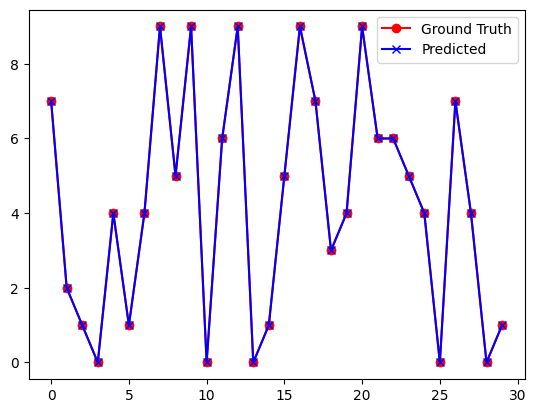

In [ ]:
# Predictions
y_pred = []
y_true = []

with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)
        y_pred.extend(pred.view(-1).numpy())
        y_true.extend(target.numpy())

# Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)
print(conf_mat)

plt.plot(range(30), y_true[:30], color='r', label='Ground Truth', linestyle='-', marker='o')
plt.plot(range(30), y_pred[:30], color='b', label='Predicted', linestyle='-', marker='x')
plt.legend()
plt.show()